 **Implement the Intensity Transformation**

51
0
100
100
100
256


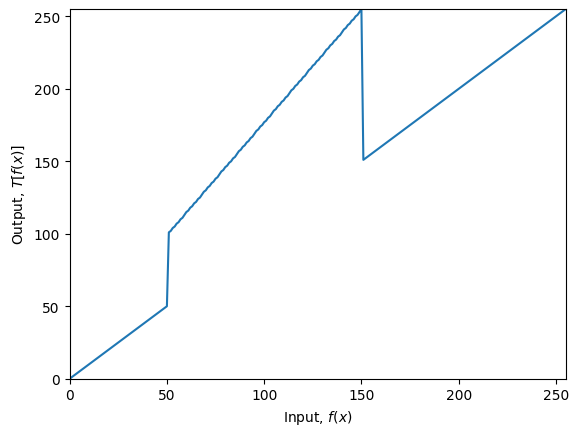

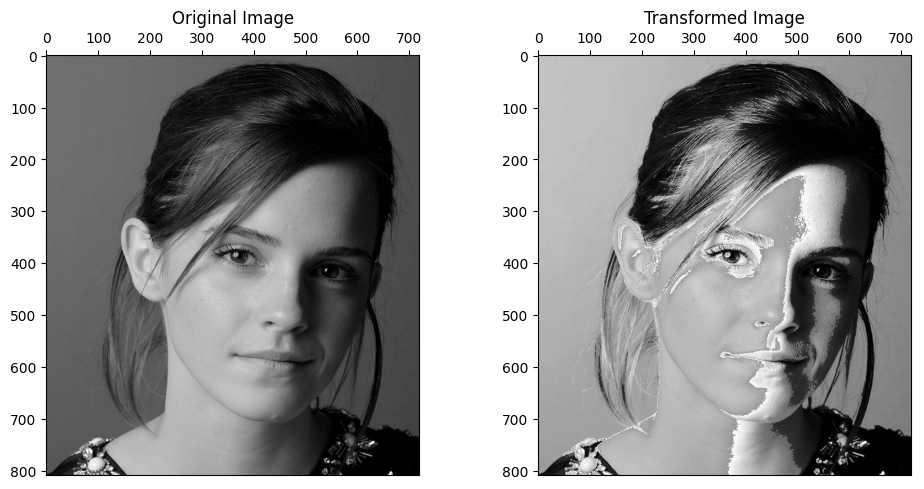

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50, 100), (150, 255), (150,150)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1], c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8') 
print(len(t3))
t4 = np.linspace(c[2,1], c[3,1], c[3,0] - c[2,0]).astype('uint8') 
print(len(t3))
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8') 
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

plt.plot(transform)
plt.xlabel('Input, $f(x)$')
plt.ylabel('Output, $T[f(x)]$')
plt.xlim(0,255)
plt.ylim(0,255)
# plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread(r"C:\Users\samko\Downloads\a1images\emma.jpg", cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')

plt.title("Original Image")
plt.imshow(img_orig, cmap='gray')


plt.subplot(1, 2, 2)
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')

plt.title("Transformed Image")
plt.imshow(image_transformed, cmap='gray')


plt.tight_layout()
plt.savefig('EMMA.png')
plt.show()

**Intensity Transformation of a Brain Proton Density Slice**

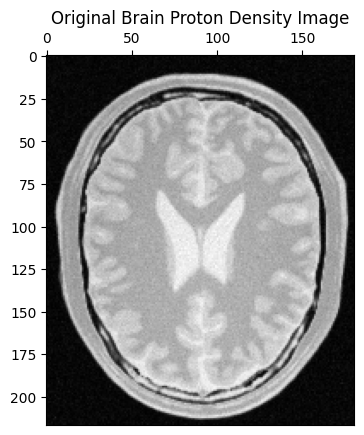

(217, 181)


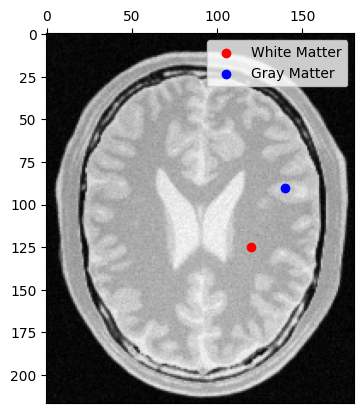

White Matter Intensity: 164
Gray Matter Intensity: 197


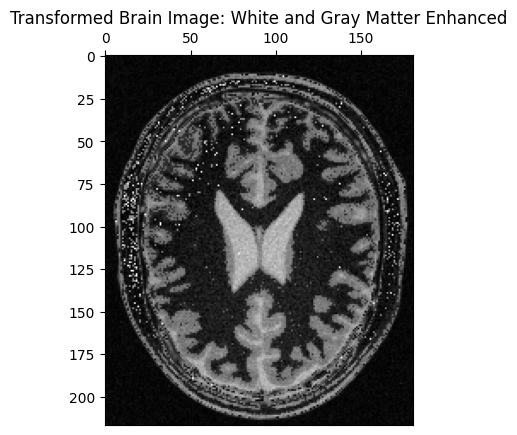

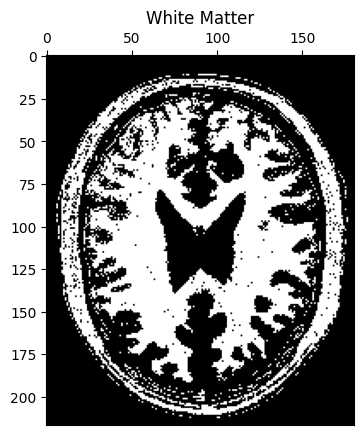

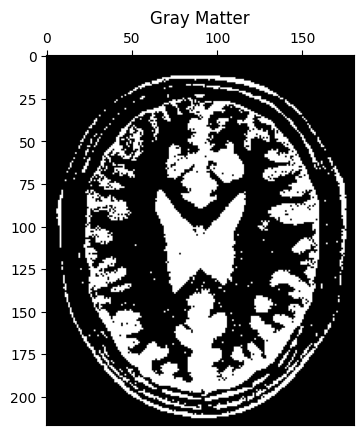

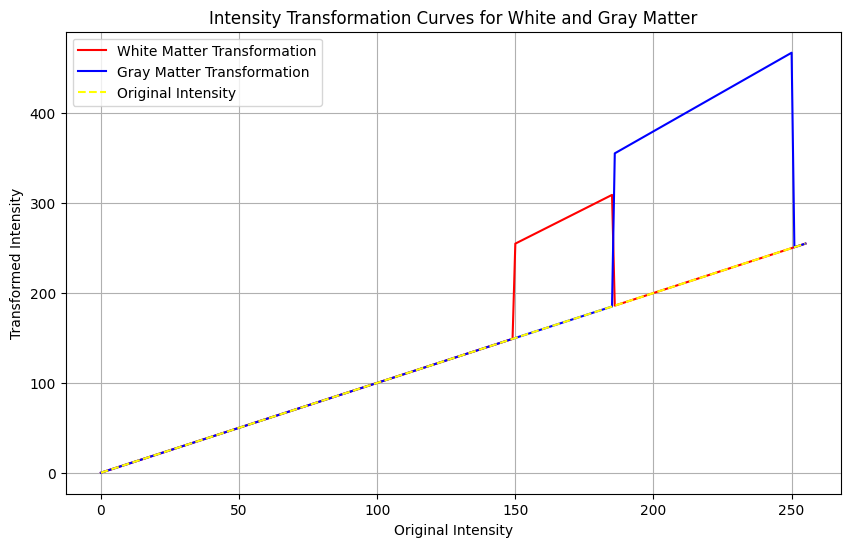

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the brain proton density image in grayscale
brain_image = cv2.imread(r"C:\Users\samko\Downloads\a1images\brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the original brain image
plt.imshow(brain_image, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.savefig("Original Brain Proton Density Image")
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.show()

# Output the shape of the image
print(brain_image.shape)

# Coordinates for sampling intensities
white_matter_coords = (120, 125)
gray_matter_coords = (140, 90)

# Show locations of white and gray matter in the image
plt.imshow(brain_image, cmap="gray")
plt.scatter(white_matter_coords[0], white_matter_coords[1], color='red', label='White Matter')
plt.scatter(gray_matter_coords[0], gray_matter_coords[1], color='blue', label='Gray Matter')
plt.legend()
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.show()

# Retrieve pixel intensities at specified points
white_matter_intensity = brain_image[white_matter_coords]
gray_matter_intensity = brain_image[gray_matter_coords]

# Output pixel intensities for white and gray matter
print(f"White Matter Intensity: {white_matter_intensity}")
print(f"Gray Matter Intensity: {gray_matter_intensity}")

# Function to apply intensity transformations for highlighting white and gray matter
def transform_intensities(image):
    # Copy the input image for transformation
    transformed_img = np.copy(image)
    
    # Apply transformation for gray matter intensities (186 to 250)
    gray_matter_mask = (image >= 186) & (image <= 250)
    transformed_img[gray_matter_mask] = 1.75 * image[gray_matter_mask] + 30
    
    # Apply transformation for white matter intensities (150 to 185)
    white_matter_mask = (image >= 150) & (image <= 185)
    transformed_img[white_matter_mask] = 1.55 * image[white_matter_mask] + 22.5
    
    return transformed_img, white_matter_mask, gray_matter_mask

# Apply the transformation to the brain image
transformed_img, white_matter_mask, gray_matter_mask = transform_intensities(brain_image)

# Display the transformed image with enhanced white and gray matter
plt.imshow(transformed_img, cmap='gray')
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.title("Transformed Brain Image: White and Gray Matter Enhanced")
plt.show()

# Display the white matter mask
plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter")
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.savefig("White Matter Transformation.png")
plt.show()

# Display the gray matter mask
plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter")
ax = plt.gca() 
ax.xaxis.set_ticks_position('top')
plt.savefig("Gray Matter Transformation.png")
plt.show()

# Create intensity transformation curves for both white and gray matter
x_vals = np.arange(0, 256)  # Intensity range (0-255)
gray_transformed = np.array([1.75 * x + 30 if 186 <= x <= 250 else x for x in x_vals])
white_transformed = np.array([1.55 * x + 22.5 if 150 <= x <= 185 else x for x in x_vals])

# Plot the transformation curves for both white and gray matter
plt.figure(figsize=(10, 6))
plt.plot(x_vals, white_transformed, label='White Matter Transformation', color='red')
plt.plot(x_vals, gray_transformed, label='Gray Matter Transformation', color='blue')
plt.plot(x_vals, x_vals, label='Original Intensity', linestyle='--', color='yellow')  # Identity line for reference
plt.title('Intensity Transformation Curves for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.savefig("Intensity Transformation Curves for White and Gray Matter.png")
plt.show()

 **Gamma Correction**

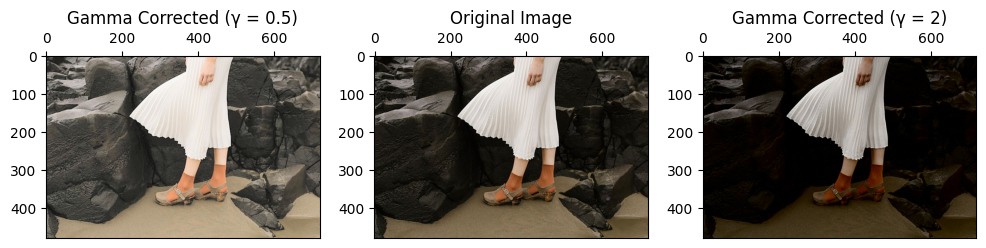

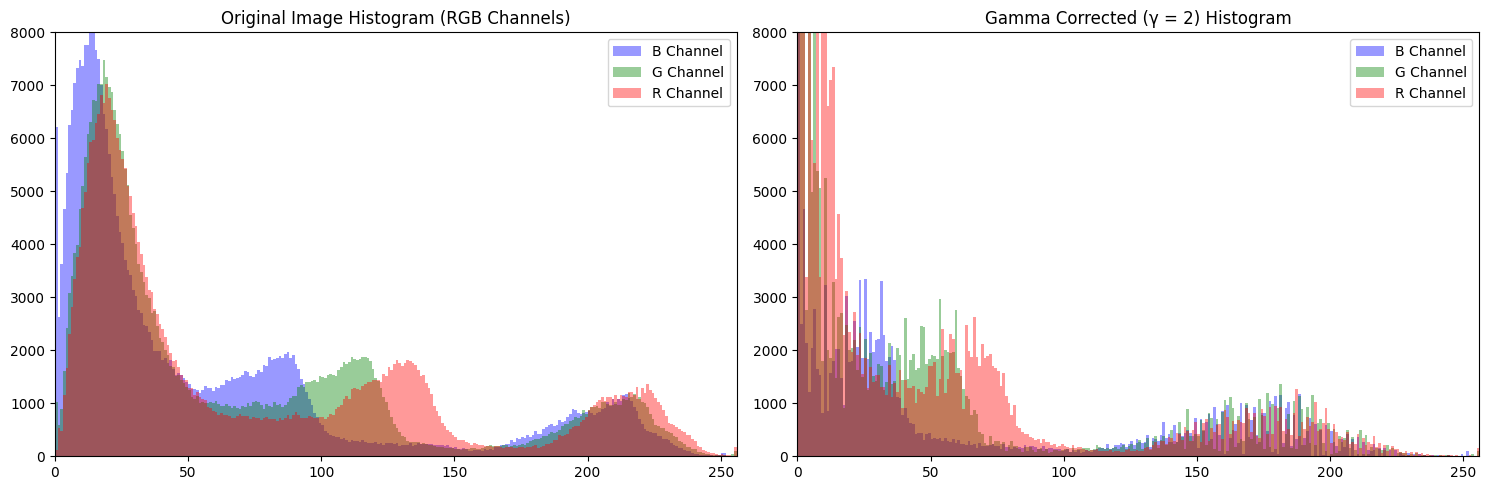

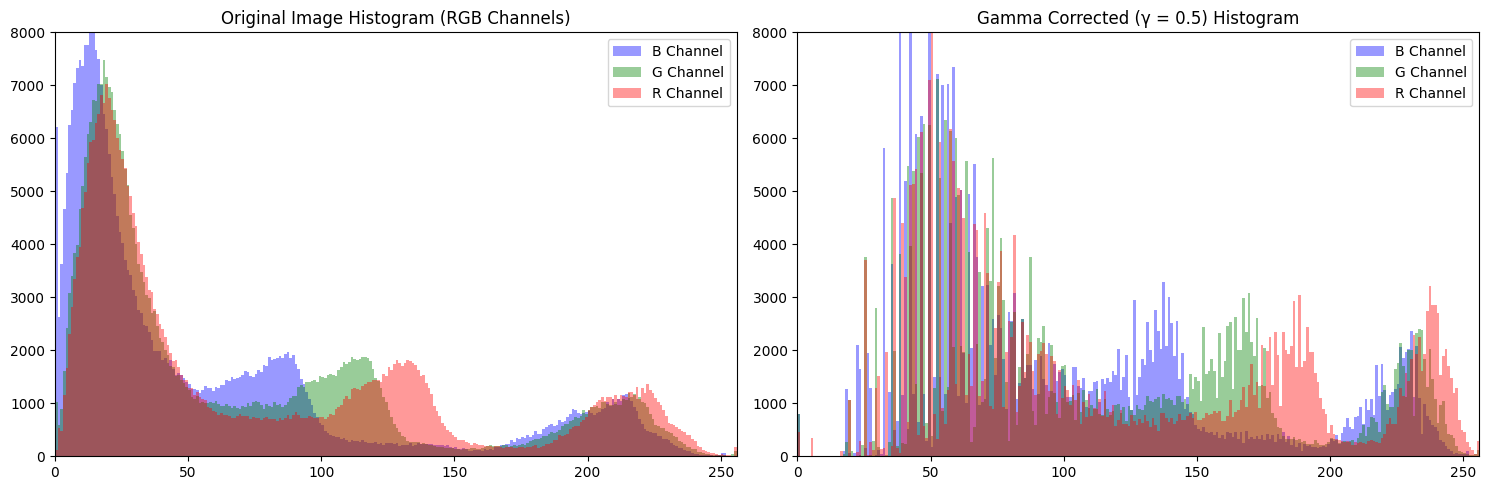

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image for gamma correction
bgr_image = cv2.imread(r"C:\Users\samko\Downloads\a1images\highlights_and_shadows.jpg")

# Convert the image from BGR to LAB color space
lab_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2LAB)

# Split the LAB image into L, A, and B channels
L_channel, A_channel, B_channel = cv2.split(lab_image)

# Normalize the L channel to the range [0, 1] for gamma correction
L_normalized = L_channel / 255.0

def apply_gamma_correction(L_norm, gamma):
    L_gamma = np.power(L_norm, gamma)
    return np.uint8(L_gamma * 255)

# Gamma values to apply
gammas = [0.5, 2]

# Store gamma corrected images
gamma_corrected_images = []

for g in gammas:
    L_gamma = apply_gamma_correction(L_normalized, g)
    lab_gamma_corrected = cv2.merge((L_gamma, A_channel, B_channel))
    gamma_corrected_bgr = cv2.cvtColor(lab_gamma_corrected, cv2.COLOR_LAB2BGR)
    gamma_corrected_images.append(gamma_corrected_bgr)

# Prepare images and titles for display
images = [
    (gamma_corrected_images[0], "Gamma Corrected (\u03B3 = 0.5)"),
    (bgr_image, "Original Image"),
    (gamma_corrected_images[1], "Gamma Corrected (\u03B3 = 2)")
]

# Display images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for ax, (img, title) in zip(axes, images):
    ax.xaxis.set_ticks_position("top")
    ax.set_title(title)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
   

plt.show()

# Histogram plotting preparation
hist_data = [
    ("Original Image Histogram (RGB Channels)", bgr_image),
    ("Gamma Corrected (\u03B3 = 2) Histogram", gamma_corrected_images[1]),
    ("Gamma Corrected (\u03B3 = 0.5) Histogram", gamma_corrected_images[0])
]

# Plot histograms in pairs: (Original + Gamma=2), (Original + Gamma=0.5)
pairs = [
    [hist_data[0], hist_data[1]],
    [hist_data[0], hist_data[2]]
]

for pair in pairs:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for ax, (title, img) in zip(axs, pair):
        ax.set_title(title)
        colors = ['b', 'g', 'r']
        for i, color in enumerate(colors):
            ax.hist(img[:, :, i].flatten(), bins=256, range=[0, 256], color=color, alpha=0.4, label=f'{color.upper()} Channel')
        ax.set_xlim([0, 256])
        ax.set_ylim([0, 8000])
        ax.legend()
        
    plt.tight_layout()
    plt.show()
    


**Increasing the Vibrance of a Photograph**

(438, 780, 3)


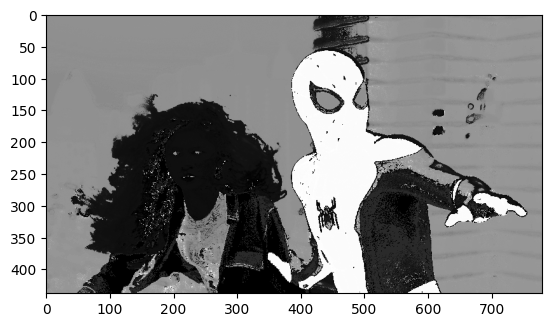

Min and Max of Hue Channel: 0, 179
Min and Max of Saturation Channel: 0, 185
Min and Max of Value Channel: 8, 231


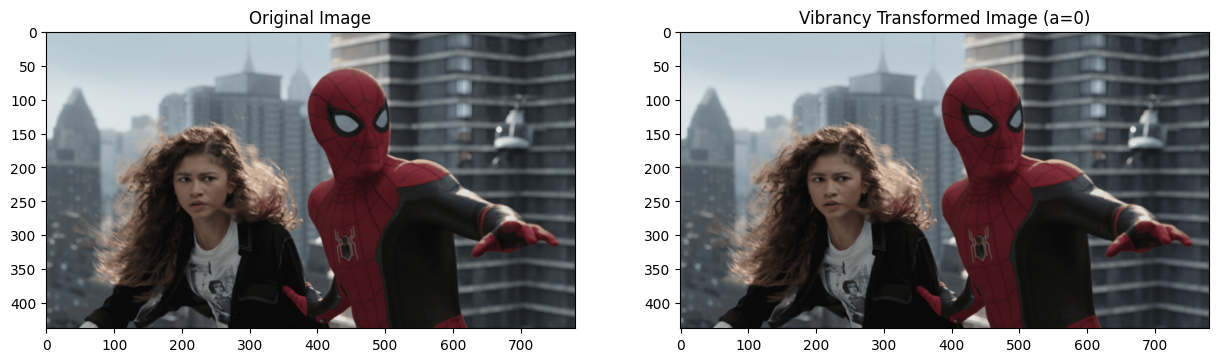

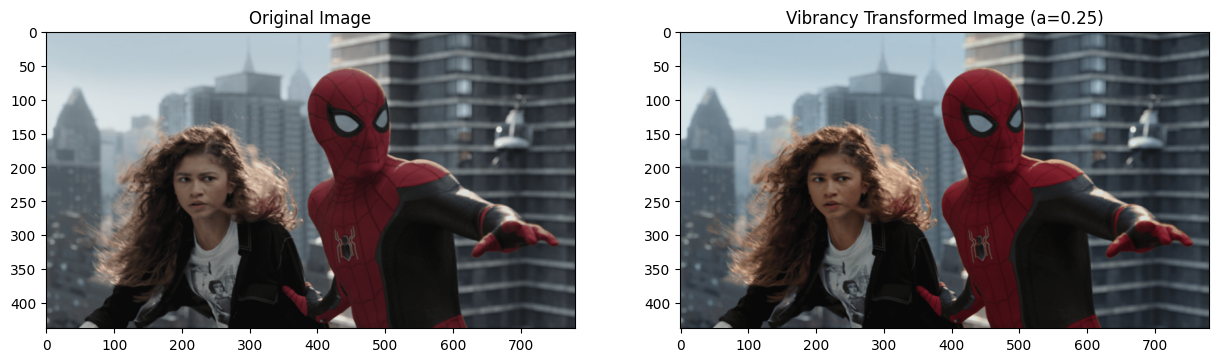

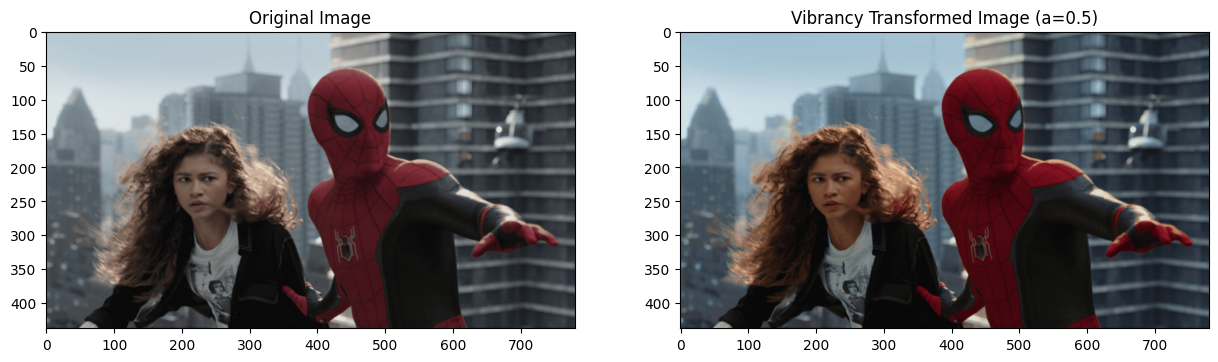

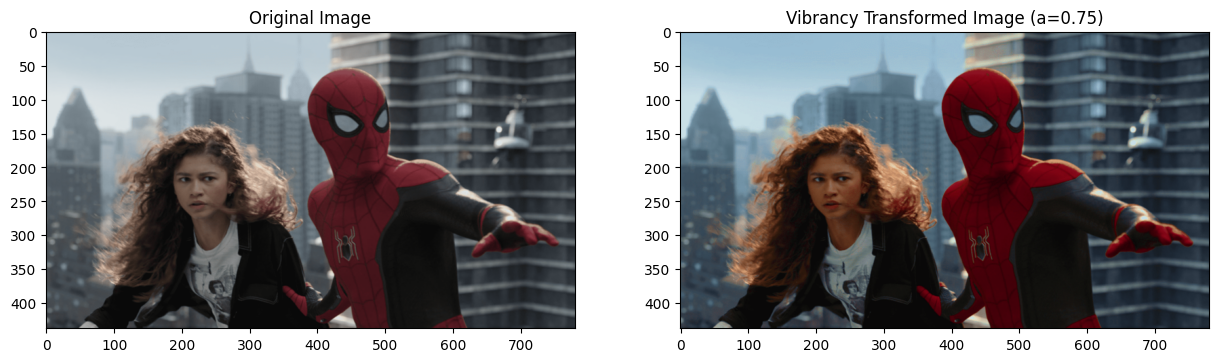

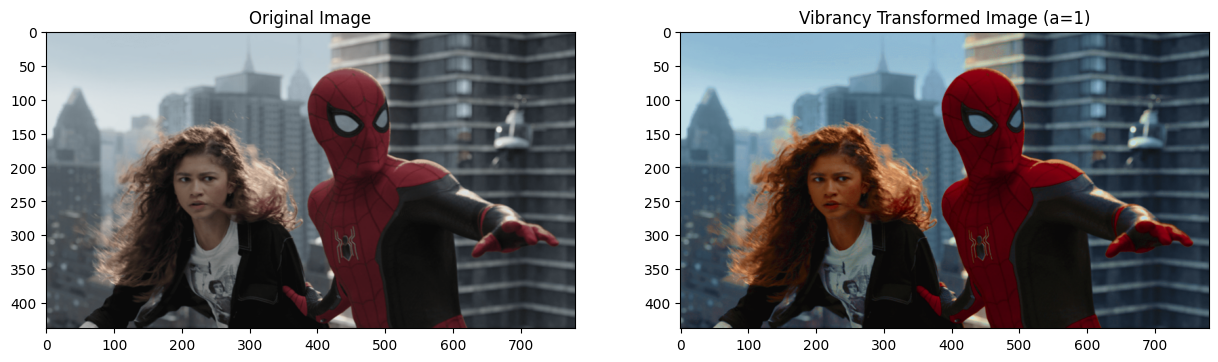

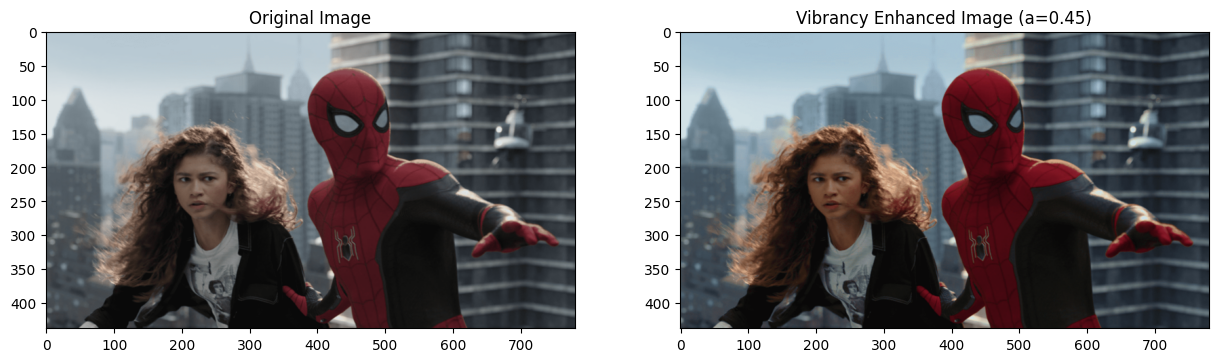

Min and Max Saturation: 0, 185


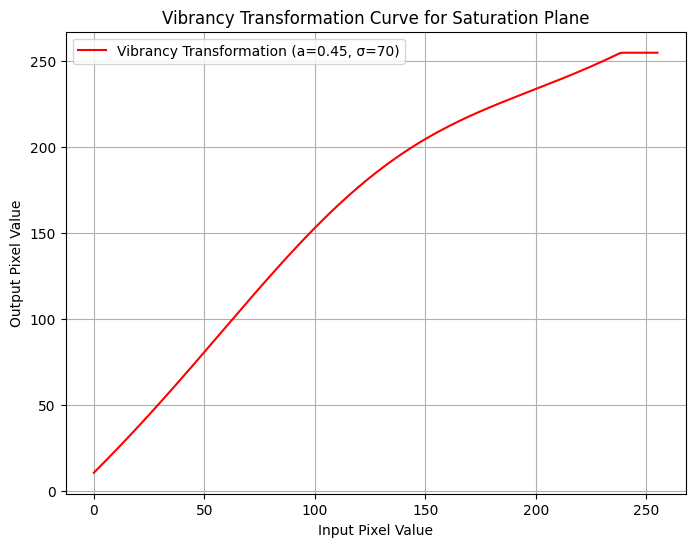

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# === Load the image ===
spiderman_image = cv2.imread(r"C:\Users\samko\Downloads\a1images\spider.png")

# Convert the image to HSV color space
hsv_spiderman_image = cv2.cvtColor(spiderman_image, cv2.COLOR_BGR2HSV)

# Display shape of the image in HSV space
print(hsv_spiderman_image.shape)

# Display the hue channel
plt.imshow(hsv_spiderman_image[:, :, 0], cmap="gray")
plt.show()

# Extract the individual H, S, and V planes
hue_channel = hsv_spiderman_image[:, :, 0]
saturation_channel = hsv_spiderman_image[:, :, 1]
value_channel = hsv_spiderman_image[:, :, 2]

# Display the min and max values of each HSV plane
print(f"Min and Max of Hue Channel: {np.min(hue_channel)}, {np.max(hue_channel)}")
print(f"Min and Max of Saturation Channel: {np.min(saturation_channel)}, {np.max(saturation_channel)}")
print(f"Min and Max of Value Channel: {np.min(value_channel)}, {np.max(value_channel)}")

# === Define the vibrancy transformation function ===
def vibrancy_transformation(input_value: int, alpha: float, sigma: int = 70) -> float:
    x = input_value
    return min(
        x + alpha * 128 * math.exp(-((x - 128) ** 2) / (2 * sigma ** 2)),
        255
    )

# Dictionary to store transformed images for different 'a' values
vibrancy_results = {0: None, 0.25: None, 0.5: None, 0.75: None, 1: None}

# === Apply vibrancy transformation for each alpha value ===
for alpha in vibrancy_results.keys():
    new_saturation = np.zeros(saturation_channel.shape, dtype=np.uint8)

    # Transform each pixel in the saturation plane
    for i in range(saturation_channel.shape[0]):
        for j in range(saturation_channel.shape[1]):
            new_saturation[i, j] = vibrancy_transformation(saturation_channel[i, j], alpha)

    # Combine H, new S, and V
    new_hsv_image = cv2.merge((hue_channel, new_saturation, value_channel))
    new_spiderman_image = cv2.cvtColor(new_hsv_image, cv2.COLOR_HSV2BGR)

    vibrancy_results[alpha] = new_spiderman_image

    # Show original and transformed images
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].set_title("Original Image")
    axs[0].imshow(cv2.cvtColor(spiderman_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f"Vibrancy Transformed Image (a={alpha})")
    axs[1].imshow(cv2.cvtColor(new_spiderman_image, cv2.COLOR_BGR2RGB))
    plt.show()

# === Applying vibrancy transformation with alpha = 0.45 ===
alpha = 0.45
new_saturation_plane = np.zeros(saturation_channel.shape, dtype=np.uint8)

for i in range(saturation_channel.shape[0]):
    for j in range(saturation_channel.shape[1]):
        new_saturation_plane[i, j] = vibrancy_transformation(saturation_channel[i, j], alpha)

new_hsv_image = cv2.merge((hue_channel, new_saturation_plane, value_channel))
final_spiderman_image = cv2.cvtColor(new_hsv_image, cv2.COLOR_HSV2BGR)

# Show original vs final enhanced image
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].set_title("Original Image")
axs[0].imshow(cv2.cvtColor(spiderman_image, cv2.COLOR_BGR2RGB))
axs[1].set_title(f"Vibrancy Enhanced Image (a={alpha})")
axs[1].imshow(cv2.cvtColor(final_spiderman_image, cv2.COLOR_BGR2RGB))
plt.show()

# Display min and max saturation values
print(f"Min and Max Saturation: {saturation_channel.min()}, {saturation_channel.max()}")

# === Generate and plot the vibrancy transformation curve ===
alpha_value = 0.45
sigma_value = 70
input_pixel_values = np.arange(0, 256)
output_pixel_values = [
    vibrancy_transformation(x, alpha_value, sigma_value) for x in input_pixel_values
]

plt.figure(figsize=(8, 6))
plt.plot(
    input_pixel_values, output_pixel_values,
    label=f'Vibrancy Transformation (a={alpha_value}, σ={sigma_value})',
    color='red'
)
plt.xlabel('Input Pixel Value')
plt.ylabel('Output Pixel Value')
plt.title('Vibrancy Transformation Curve for Saturation Plane')
plt.legend()
plt.grid(True)
plt.show()
